<a href="https://colab.research.google.com/github/EllieMwangi/FIFA-Match-Prediction/blob/master/FIFA_Match_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FIFA Match Prediction

### 1. Define Analysis Question

- Build a regression model that predicts the home team's score for each match
- Build a classifier that predicts whether the home team will win, lose or have a draw.

### 2. Metrics for Success
- Performance of the regression models will be determined using the RMSE score.
- Classifier accuracy will be determined using the confusion matrix and classification report.

### 3. Understanding the Context
As a football analyst in Mchezopesa Ltd, the management is interested in a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. Football matches and FIFA rankings data has been provided for analysis.

### Experimental Design Approach

1. Data Exploration
2. Feature Engineering
3. Data Analysis
4. Modelling
5. Results and Conclusions
6. Challenging Solution

### Data Exploration

In [165]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)


In [166]:
# Load data
rank = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

In [167]:
# Preview data
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [168]:
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [169]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [170]:
results.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
38166,2016-09-01,Colombia,Venezuela,2,0,FIFA World Cup qualification,Barranquilla,Colombia,False
33873,2012-02-29,Guinea-Bissau,Cameroon,0,1,African Cup of Nations qualification,Bissau,Guinea-Bissau,False
13071,1984-06-18,Guyana,India,3,0,Friendly,Georgetown,Guyana,False
19857,1996-09-13,Thailand,Vietnam,4,2,AFF Championship,Singapore,Singapore,True
29268,2007-06-17,Cameroon,Rwanda,2,1,African Cup of Nations qualification,Garoua,Cameroon,False


In [171]:
# Size of data
display(rank.shape)
display(results.shape)

(57793, 16)

(40839, 9)

In [172]:
# Describe rank data
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [173]:
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [174]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [175]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [176]:
# Check for duplicates
rank.duplicated().sum()

37

In [177]:
# Drop duplicates
rank.drop_duplicates(inplace=True)

In [178]:
results.duplicated().sum()

0

In [179]:
# Check for uniformity in naming
obj_col = ['country_full', 'confederation']

for col in obj_col:
  print(rank[col].unique())

['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'
 'Republic of Ireland' 'Russia' 'Brazil' 'Norway' 'Denmark' 'England'
 'France' 'Spain' 'Mexico' 'RCS' 'Netherlands' 'Nigeria' 'Belgium'
 'Colombia' 'Poland' 'Romania' 'Uruguay' 'Portugal' 'Cameroon' 'Zambia'
 'Egypt' 'Wales' 'USA' "Côte d'Ivoire" 'Scotland' 'Tunisia' 'Greece'
 'Morocco' 'Algeria' 'Ecuador' 'Korea Republic' 'Bulgaria' 'Austria'
 'Costa Rica' 'Northern Ireland' 'Honduras' 'Hungary' 'Japan'
 'Saudi Arabia' 'China PR' 'Canada' 'Finland' 'Ghana' 'Chile' 'Zimbabwe'
 'Qatar' 'Australia' 'Iceland' 'IR Iran' 'United Arab Emirates'
 'Yugoslavia' 'Iraq' 'Senegal' 'Bolivia' 'Kuwait' 'Korea DPR'
 'El Salvador' 'Turkey' 'Gabon' 'Guinea' 'Thailand' 'Paraguay' 'Malawi'
 'Israel' 'Peru' 'Zaire' 'Cyprus' 'Singapore' 'Mali' 'Malaysia' 'Bermuda'
 'Niger' 'Syria' 'Bahrain' 'New Zealand' 'Madagascar' 'Malta' 'Jamaica'
 'Lithuania' 'Trinidad and Tobago' 'Sierra Leone' 'Jordan' 'Kenya'
 'Latvia' 'Yemen' 'Tanzania' 'Albania' 'Angola' 'Vene

In [180]:
obj_col = ['home_team', 'away_team', 'tournament','neutral']

for col in obj_col:
  print(f'Column: {col}')
  print(results[col].unique())
  print('\n')

Column: home_team
['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghanistan' 'India' 'Martinique'
 'Zimbabwe' '

### Feature Engineering

In [181]:
# Create a status column which indicates if home team wins or loses
conditions = [
              results['home_score'] > results['away_score'],
              results['home_score'] < results['away_score'],
              results['home_score'] == results['away_score']
]

values = ['Win', 'Loss', 'Draw']

results['game_status_home'] = np.select(conditions, values)

In [182]:
# Convert date column to date
results['date'] = pd.to_datetime(results['date'])
rank['rank_date'] = pd.to_datetime(rank['rank_date'])

In [183]:
# Determine years in rank data
rank['rank_date'].dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [184]:
# Determine years in results data:
results['date'].dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [185]:
# Add year and month variables
rank['year'] = rank['rank_date'].dt.year
rank['month'] = rank['rank_date'].dt.month

In [186]:
results['year'] = results['date'].dt.year
results['month'] = results['date'].dt.month

In [187]:
# Sort ranking data by country name, year and month columns
rank.sort_values(by=['country_full', 'year','month'], inplace=True)

In [188]:
# Create index
country_rankings = list(zip(rank['country_full'], rank['year'], rank['month'])) 
rankings = rank['rank'].values
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [189]:
index = pd.MultiIndex.from_tuples(country_rankings)
index.names = ['country', 'year','month']

In [190]:
rank_only = pd.Series(rankings, index=country_rankings)
rank_only = rank_only.reindex(index)

In [191]:
# Make sure that only matches that have rank data are in results
results = results[results['year'].isin(rank['year'].unique())]

In [192]:
def rank_checker(country, year, month, ranker):
  if country in ranker[:,year,month].index:
    return ranker[country,year,month]
  else:
    return 'Unknown'

In [193]:
# Get rank of each home team at time of match
results['home_team_rank'] = results.apply(lambda row: rank_checker(row['home_team'], row['year'], row['month'], rank_only),axis=1)
results['away_team_rank'] = results.apply(lambda row: rank_checker(row['away_team'], row['year'], row['month'], rank_only),axis=1)

In [194]:
# Drop rows where rank is unknown
rank_results = results[results.home_team_rank != 'Unknown']
rank_results = rank_results[rank_results.away_team_rank != 'Unknown']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:57: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [195]:
rank_results.away_team_rank.value_counts()

1             155
26            145
2             143
6             141
4             138
             ... 
[20, 20]        1
[63, 67]        1
[120, 127]      1
[100, 87]       1
[2, 2]          1
Name: away_team_rank, Length: 258, dtype: int64

It appears that some teams have multiple away team ranks in the results data, could there be duplication in the data?

In [196]:
multiple_ranks_away = []
for i in rank_results.away_team_rank.value_counts().index.to_list():
  if type(i) is np.ndarray:
    multiple_ranks_away.append(i)

In [197]:
rank_results[rank_results['away_team_rank'].isin(multiple_ranks_away)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_status_home,year,month,home_team_rank,away_team_rank
31932,2010-03-02,Republic of Ireland,Brazil,0,2,Friendly,London,England,True,Loss,2010,3,"[39, 44]","[2, 2]"
31933,2010-03-03,Albania,Northern Ireland,1,0,Friendly,Tirana,Albania,False,Win,2010,3,"[96, 83]","[39, 50]"
31934,2010-03-03,Algeria,Serbia,0,3,Friendly,Algiers,Algeria,False,Loss,2010,3,"[32, 27]","[13, 15]"
31935,2010-03-03,Angola,Latvia,1,1,Friendly,Luanda,Angola,False,Draw,2010,3,"[86, 86]","[47, 46]"
31936,2010-03-03,Armenia,Belarus,1,3,Friendly,Antalya,Turkey,True,Loss,2010,3,"[103, 106]","[79, 80]"
31937,2010-03-03,Australia,Indonesia,1,0,AFC Asian Cup qualification,Brisbane,Australia,False,Win,2010,3,"[23, 19]","[137, 138]"
31938,2010-03-03,Austria,Denmark,2,1,Friendly,Vienna,Austria,False,Win,2010,3,"[56, 55]","[33, 34]"
31939,2010-03-03,Belgium,Croatia,0,1,Friendly,Brussels,Belgium,False,Loss,2010,3,"[68, 66]","[11, 10]"
31940,2010-03-03,Bosnia and Herzegovina,Ghana,2,1,Friendly,Sarajevo,Bosnia and Herzegovina,False,Win,2010,3,"[49, 47]","[28, 31]"
31941,2010-03-03,Cyprus,Iceland,0,0,Friendly,Larnaca,Cyprus,False,Draw,2010,3,"[66, 70]","[91, 90]"


In [198]:
rank[(rank.country_full=='Brazil') & (rank.year ==  2010) & (rank.month == 3)]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
36862,2,Brazil,BRA,0.0,1568,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2010-03-03,2010,3
37069,2,Brazil,BRA,0.0,1594,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2010-03-31,2010,3


Teams that had matches in March 2010 seem to have double rankings. To address this, select the ranking at the beginning of the month.

In [199]:
rank_results['home_team_rank'].value_counts()

5             164
1             160
2             155
4             153
8             152
             ... 
[46, 45]        1
[106, 102]      1
[127, 129]      1
[116, 101]      1
[39, 44]        1
Name: home_team_rank, Length: 258, dtype: int64

In [200]:
multiple_ranks_home = []
for i in rank_results.home_team_rank.value_counts().index.to_list():
  if type(i) is np.ndarray:
    multiple_ranks_home.append(i)

In [201]:
rank_results[rank_results['home_team_rank'].isin(multiple_ranks_home)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_status_home,year,month,home_team_rank,away_team_rank
31932,2010-03-02,Republic of Ireland,Brazil,0,2,Friendly,London,England,True,Loss,2010,3,"[39, 44]","[2, 2]"
31933,2010-03-03,Albania,Northern Ireland,1,0,Friendly,Tirana,Albania,False,Win,2010,3,"[96, 83]","[39, 50]"
31934,2010-03-03,Algeria,Serbia,0,3,Friendly,Algiers,Algeria,False,Loss,2010,3,"[32, 27]","[13, 15]"
31935,2010-03-03,Angola,Latvia,1,1,Friendly,Luanda,Angola,False,Draw,2010,3,"[86, 86]","[47, 46]"
31936,2010-03-03,Armenia,Belarus,1,3,Friendly,Antalya,Turkey,True,Loss,2010,3,"[103, 106]","[79, 80]"
31937,2010-03-03,Australia,Indonesia,1,0,AFC Asian Cup qualification,Brisbane,Australia,False,Win,2010,3,"[23, 19]","[137, 138]"
31938,2010-03-03,Austria,Denmark,2,1,Friendly,Vienna,Austria,False,Win,2010,3,"[56, 55]","[33, 34]"
31939,2010-03-03,Belgium,Croatia,0,1,Friendly,Brussels,Belgium,False,Loss,2010,3,"[68, 66]","[11, 10]"
31940,2010-03-03,Bosnia and Herzegovina,Ghana,2,1,Friendly,Sarajevo,Bosnia and Herzegovina,False,Win,2010,3,"[49, 47]","[28, 31]"
31941,2010-03-03,Cyprus,Iceland,0,0,Friendly,Larnaca,Cyprus,False,Draw,2010,3,"[66, 70]","[91, 90]"


From a cursory glance, it appears that both dataframes contain the same records, however to ascertain compare indices between the two

In [202]:
set(rank_results[rank_results['home_team_rank'].isin(multiple_ranks_home)].index).difference(set(rank_results[rank_results['away_team_rank'].isin(multiple_ranks_away)].index))

set()

In [203]:
set(rank_results[rank_results['away_team_rank'].isin(multiple_ranks_away)].index).difference(set(rank_results[rank_results['home_team_rank'].isin(multiple_ranks_home)].index))

set()

The sets are empty thus the two frames are equal.

In [204]:
# Remove duplicates in ranking data
rank_only = rank_only[~rank_only.index.duplicated(keep='first')]

In [205]:
# Get rank of each home team and away team at time of match
rank_results['home_team_rank'] = rank_results.apply(lambda row: rank_checker(row['home_team'], row['year'], row['month'], rank_only),axis=1)
rank_results['away_team_rank'] = rank_results.apply(lambda row: rank_checker(row['away_team'], row['year'], row['month'], rank_only),axis=1)

In [206]:
rank_results.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_status_home,year,month,home_team_rank,away_team_rank
31354,2009-06-28,Mexico,Guatemala,0,0,Friendly,San Diego,United States,True,Draw,2009,6,26,112
35124,2013-06-04,Tajikistan,Afghanistan,3,2,Friendly,Qurghonteppa,Tajikistan,False,Win,2013,6,112,140
25859,2003-09-10,Faroe Islands,Lithuania,1,3,UEFA Euro qualification,Toftir,Faroe Islands,False,Loss,2003,9,124,91
30798,2008-10-17,Nepal,Afghanistan,2,2,Merdeka Tournament,Petaling Jaya,Malaysia,True,Draw,2008,10,175,182
29764,2007-11-20,Colombia,Argentina,2,1,FIFA World Cup qualification,Bogotá,Colombia,False,Win,2007,11,17,1


In [207]:
dup_rank = rank[(rank.year==2010) & (rank.month==3)]
dup_index = dup_rank['country_full'].duplicated()
dup_index = dup_index[dup_index == True].index

In [208]:
# Create frame with point data
point_data = rank[['total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'country_full','year','month']].drop(dup_index)


rank_results = pd.merge(rank_results, point_data, how='inner', left_on=['home_team', 'year', 'month'], right_on=['country_full','year','month'])



In [209]:
# Rename column names to include home tag
col_names = ['total_points','previous_points', 'rank_change', 'cur_year_avg','cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted','two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation']
new_col_names = []
for col in col_names:
  tag = 'home'+ "_" + col
  new_col_names.append(tag)

new_col_dict = dict(zip(col_names, new_col_names))
rank_results.rename(columns=new_col_dict, inplace=True)

In [210]:
rank_results.drop('country_full', axis=1, inplace=True)

rank_results = pd.merge(rank_results, point_data, how='inner', left_on=['away_team', 'year', 'month'], right_on=['country_full','year','month'])


In [211]:
# Rename column names to include away tag
col_names = ['total_points','previous_points', 'rank_change', 'cur_year_avg','cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted','two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation']
new_col_names = []
for col in col_names:
  tag = 'away'+ "_" + col
  new_col_names.append(tag)

new_col_dict = dict(zip(col_names, new_col_names))
rank_results.rename(columns=new_col_dict, inplace=True)

In [212]:
rank_results.drop('country_full', axis=1, inplace=True)

rank_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_status_home,year,month,home_team_rank,away_team_rank,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,home_cur_year_avg_weighted,home_last_year_avg,home_last_year_avg_weighted,home_two_year_ago_avg,home_two_year_ago_weighted,home_three_year_ago_avg,home_three_year_ago_weighted,home_confederation,away_total_points,away_previous_points,away_rank_change,away_cur_year_avg,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,away_confederation
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,Draw,1993,8,19,67,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,Draw,1993,8,5,67,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
2,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,Win,1993,8,19,5,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,Loss,1993,8,70,5,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,Loss,1993,8,67,5,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


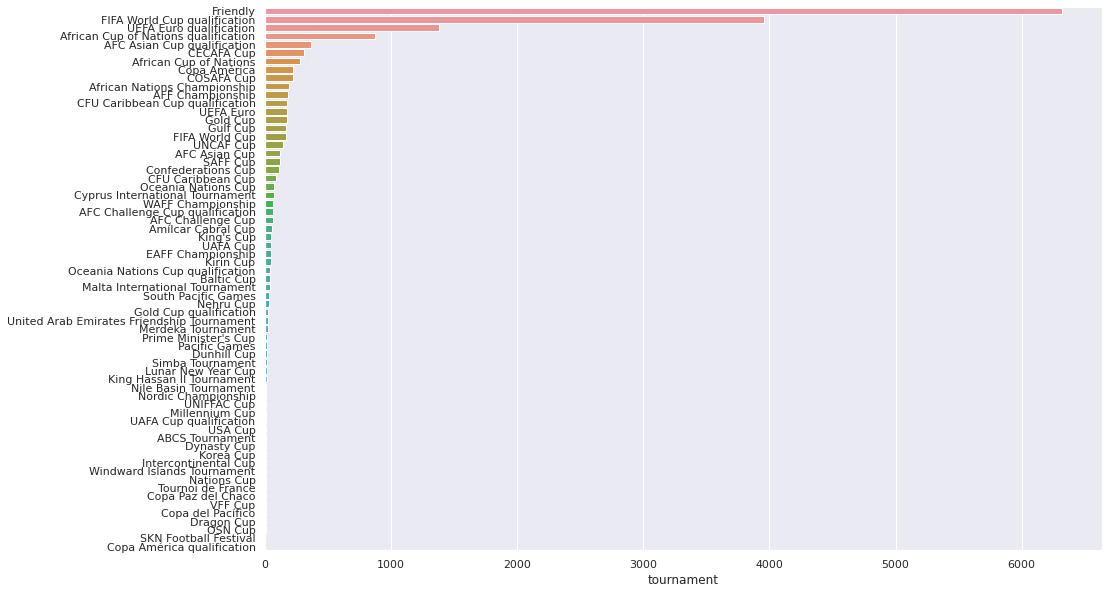

In [213]:
# Investigate types of tournaments
plt.figure(figsize=(15,10))
sns.barplot(rank_results.tournament.value_counts(), rank_results.tournament.value_counts().index)

A majority of matches are friendly matches.

In [215]:
rank_results['tournament'] = np.where(rank_results['tournament']=='Friendly', 1,0)

In [216]:
to_drop = ['date','home_team','away_team','city','country','year','month','home_confederation','away_confederation']

In [217]:
# Create dataframe consisting of match statistics
match_stats = rank_results.drop(to_drop, axis=1)

In [218]:
match_stats.shape

(16771, 29)

In [219]:
match_stats.columns

Index(['home_score', 'away_score', 'tournament', 'neutral', 'game_status_home',
       'home_team_rank', 'away_team_rank', 'home_total_points',
       'home_previous_points', 'home_rank_change', 'home_cur_year_avg',
       'home_cur_year_avg_weighted', 'home_last_year_avg',
       'home_last_year_avg_weighted', 'home_two_year_ago_avg',
       'home_two_year_ago_weighted', 'home_three_year_ago_avg',
       'home_three_year_ago_weighted', 'away_total_points',
       'away_previous_points', 'away_rank_change', 'away_cur_year_avg',
       'away_cur_year_avg_weighted', 'away_last_year_avg',
       'away_last_year_avg_weighted', 'away_two_year_ago_avg',
       'away_two_year_ago_weighted', 'away_three_year_ago_avg',
       'away_three_year_ago_weighted'],
      dtype='object')

### Data Analysis

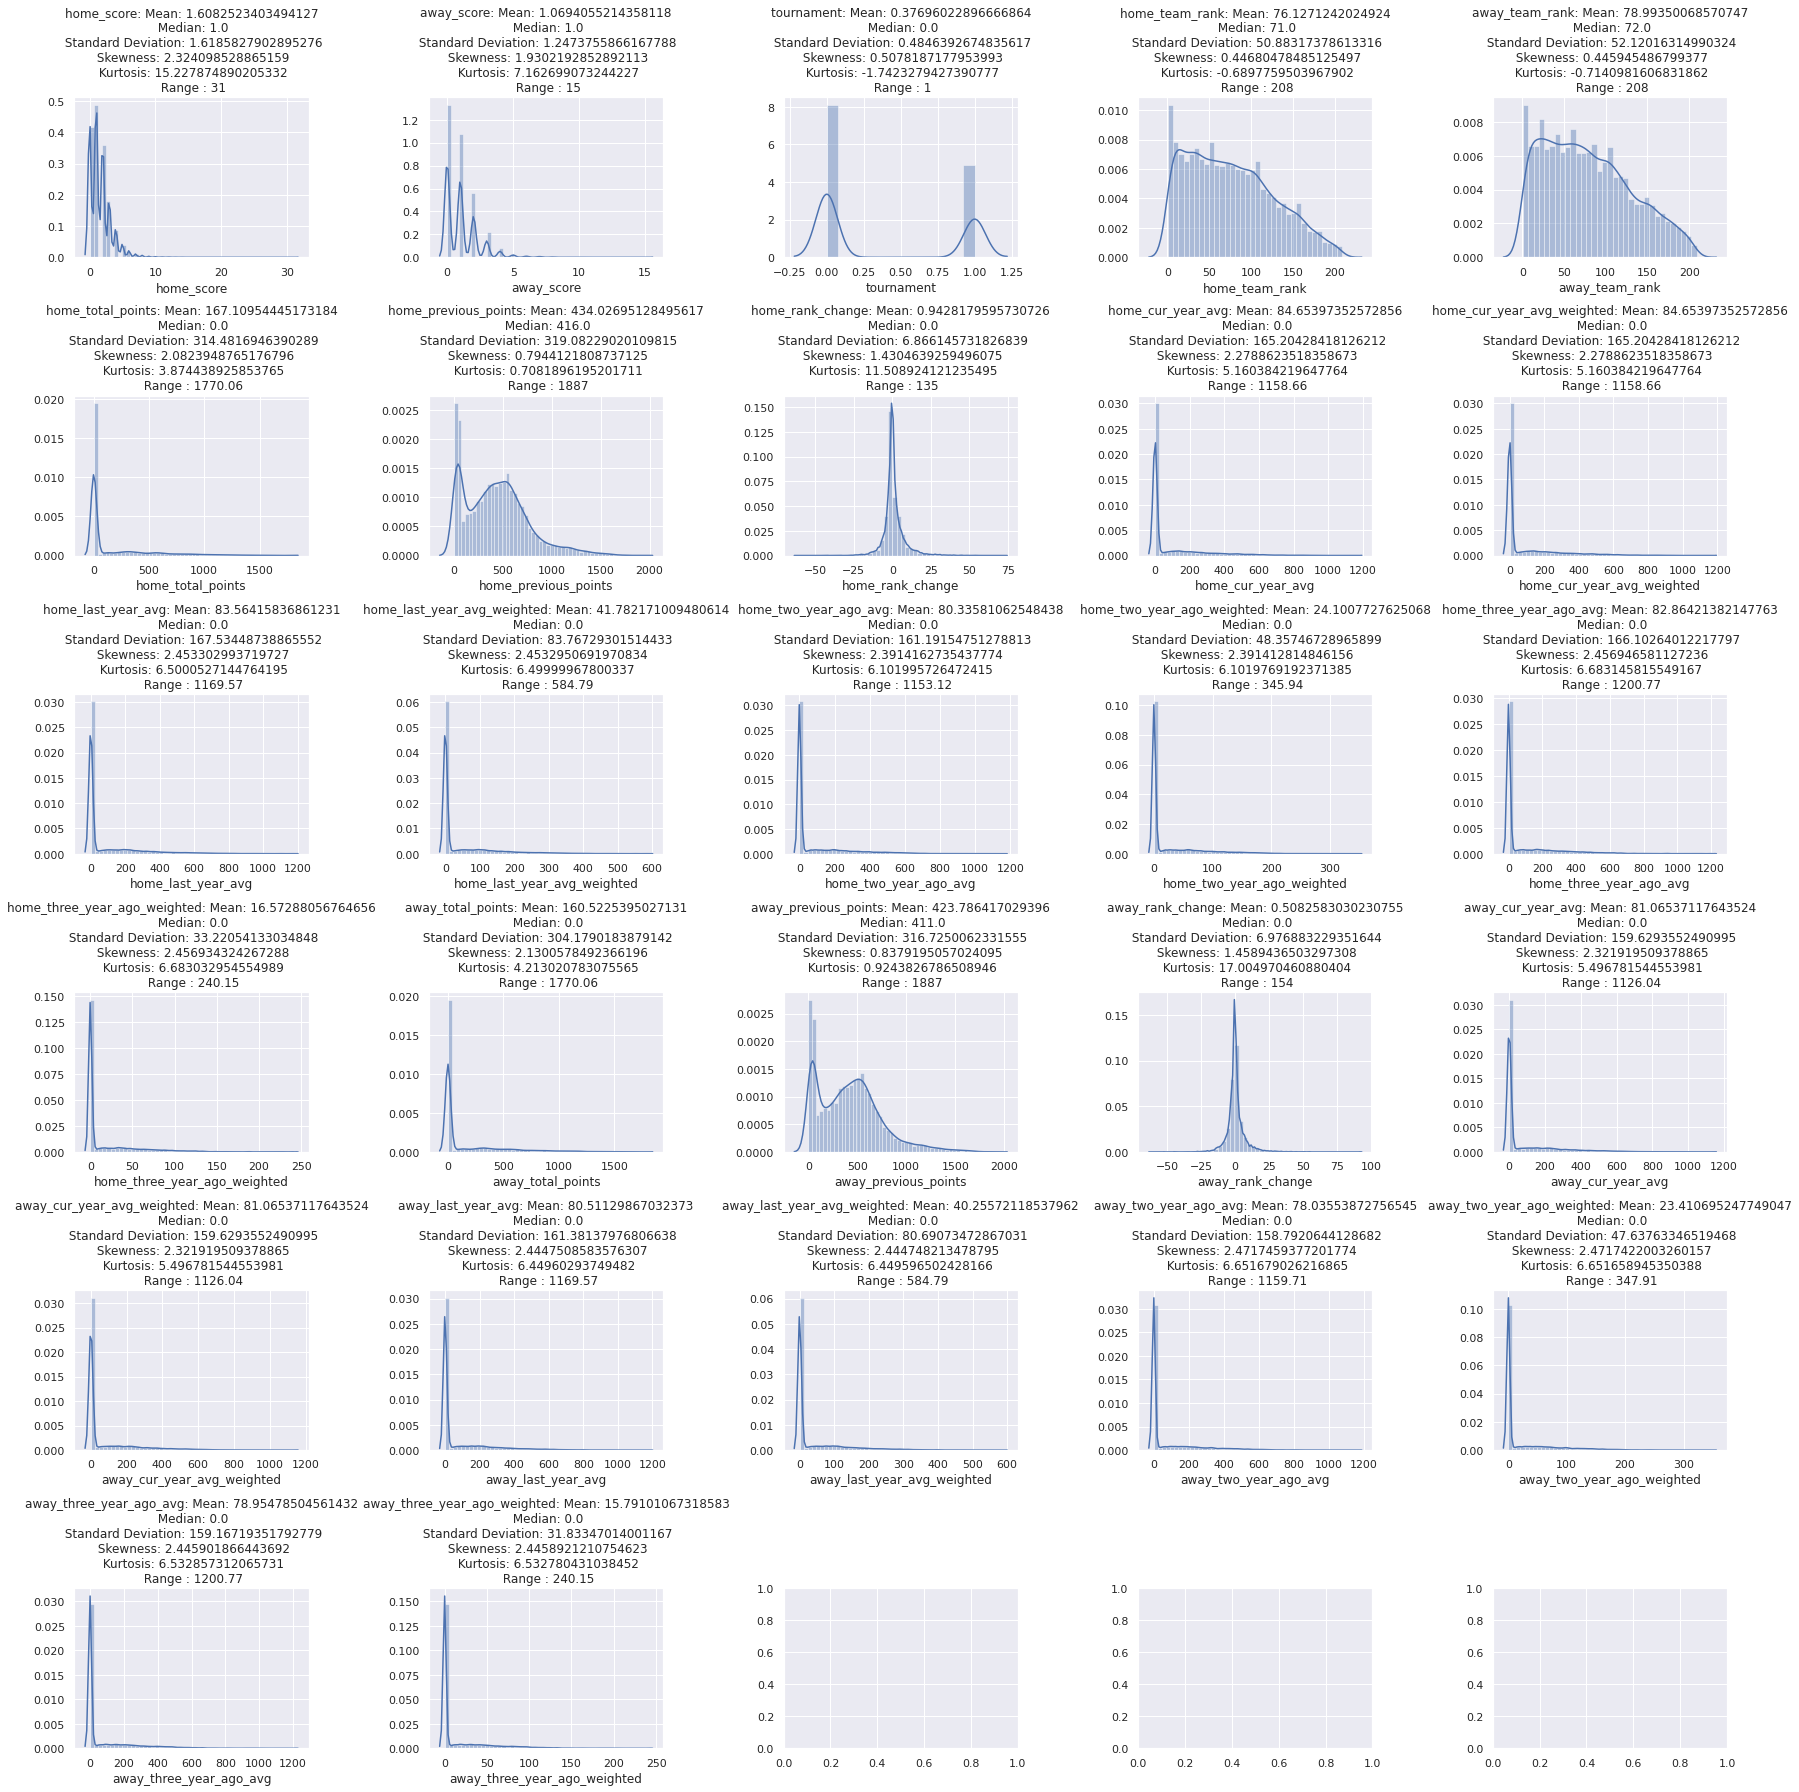

In [220]:
# Univariate analysis of numerical variables
num_var = match_stats.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 25))

for col, ax in zip(num_var, axes.flatten()):

  mean = match_stats[col].mean()
  median = match_stats[col].median()
  standard_var = match_stats[col].std()
  skew = match_stats[col].skew()
  kurt = match_stats[col].kurt()
  range = match_stats[col].max() - match_stats[col].min()

  sns.distplot(match_stats[col], hist=True, ax=ax)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Range : {range}')

plt.tight_layout()
  


A large percentage of the teams averages: current, previous year, two years ago and three years ago are 0. 

In [221]:
# Get crosstabulation between neutral column and home game result
table_neutral = pd.crosstab(match_stats['game_status_home'], match_stats['neutral'])
table_neutral

neutral,False,True
game_status_home,,
Draw,3069,957
Loss,3278,1344
Win,6457,1666


The neutrality of where the game was played seems to have an influence on whether the game result. A chi-square test can be used to test this hypothesis.

- H0: No relationship between neutrality of where match was played and game results
- H1: Relationship between neutrality of where match was played and game results

In [222]:
# chi-square test with alpha 0.05
stat, p, dof, expected = chi2_contingency(table_neutral.to_numpy())

#Calculate critical value, set significance level to 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 5.991464547107979, test_statistic: 119.80823054475657, alpha: 0.050000000000000044, p_value: 9.637697566645339e-27


p-value is less than alpha, significant evidence to reject the null hypothesis.

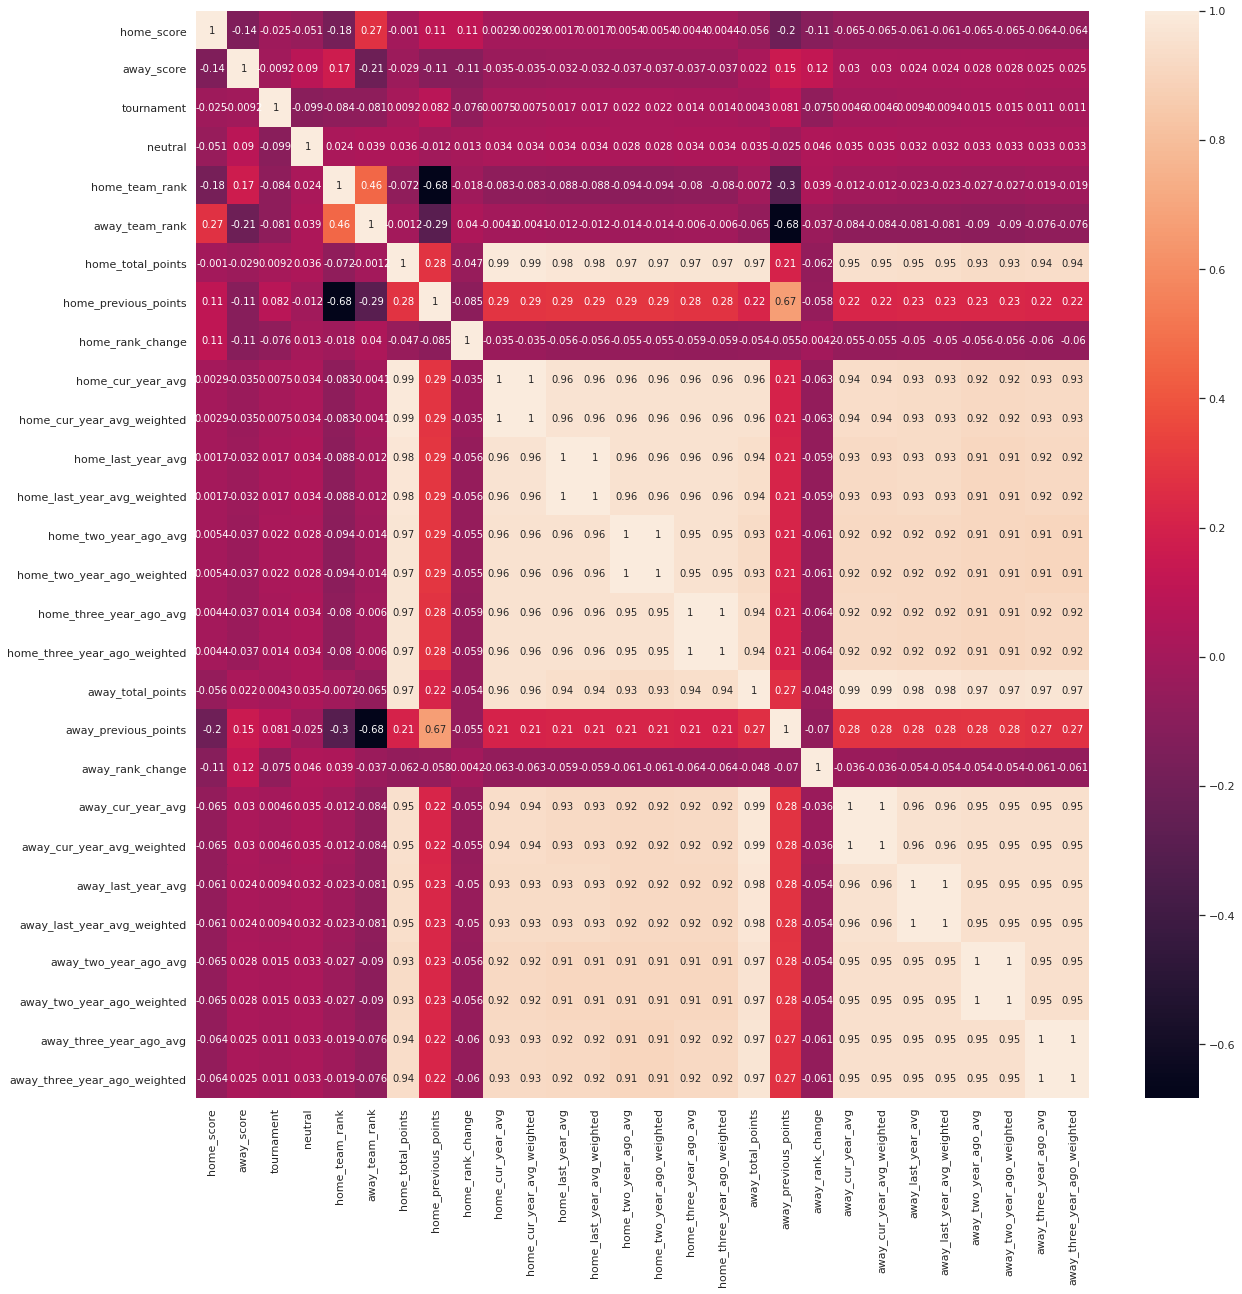

In [223]:
# Test for multicollinearity
plt.figure(figsize=(20, 20))
sns.heatmap(match_stats.corr(method='spearman'), annot=True)

There is high correlation between the teams' averages along the years. There is also high correlation between the home team averages and the away team averages. To deal with this, reserve only the weighted averages

In [224]:
to_drop = ['home_cur_year_avg','home_last_year_avg','home_two_year_ago_avg','home_three_year_ago_avg','away_cur_year_avg','away_last_year_avg','away_two_year_ago_avg','away_three_year_ago_avg']
updated_match_stats = match_stats.drop(to_drop, axis=1)

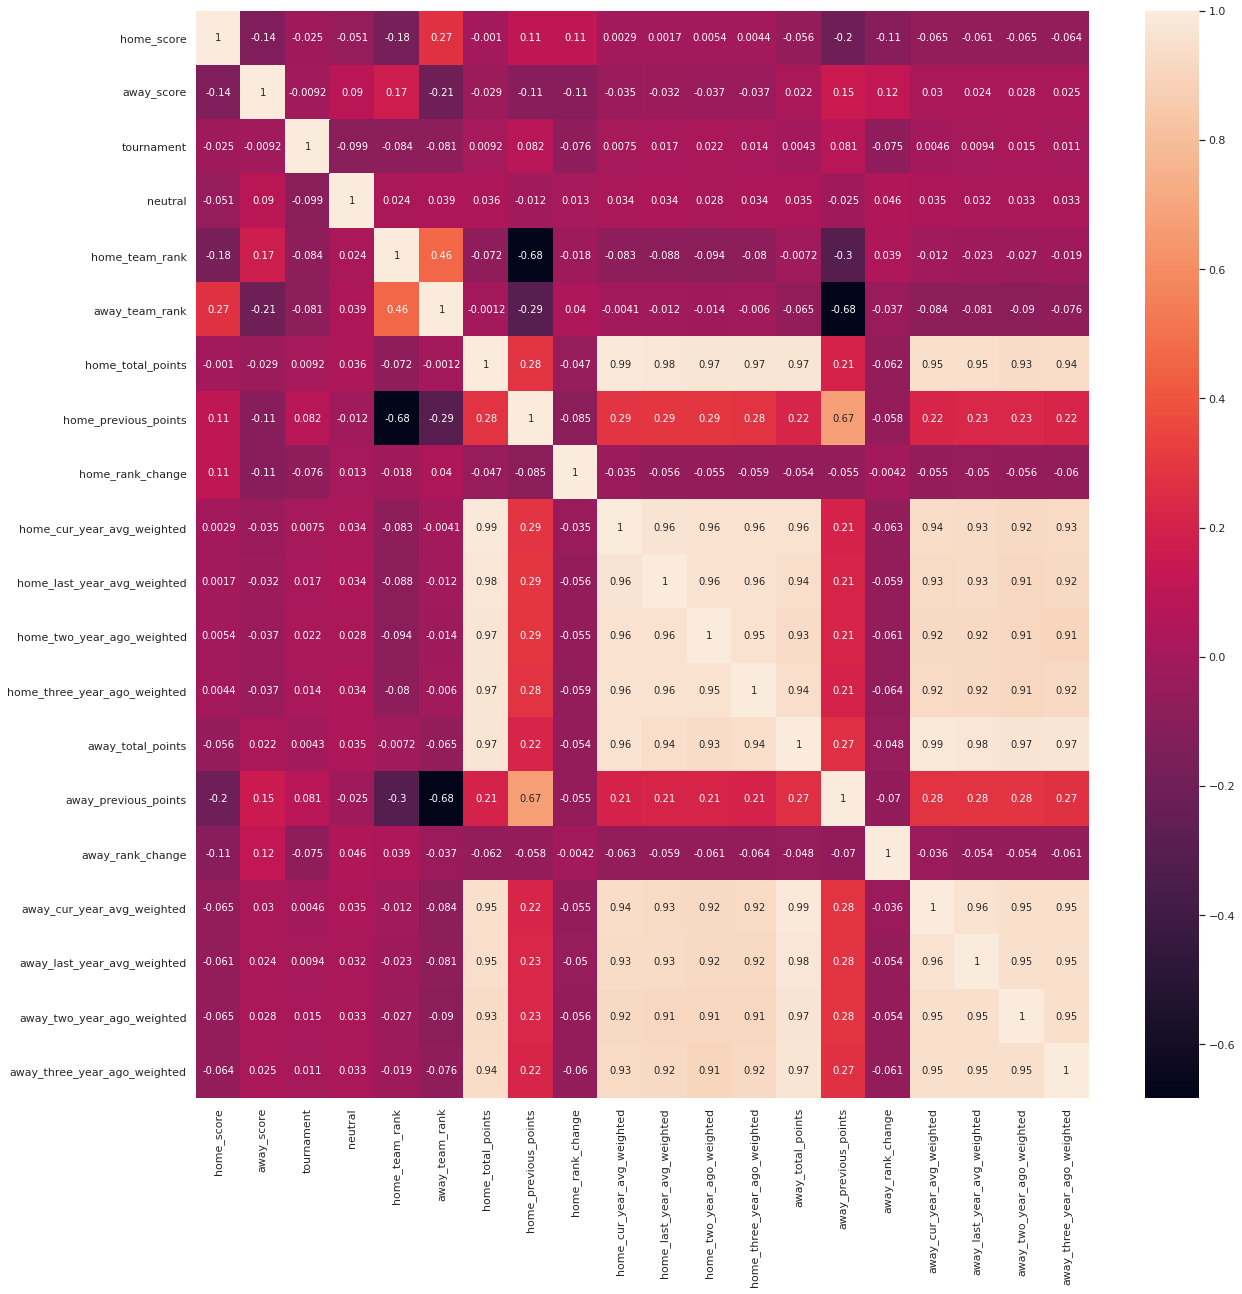

In [225]:
# Test for multicollinearity
plt.figure(figsize=(20, 20))
sns.heatmap(updated_match_stats.corr(method='spearman'), annot=True)

Despite removal of the average points, high correlation still exists among weighted averages. To reduce this get rid of the previous years' averages

In [226]:
updated_match_stats.drop(['home_last_year_avg_weighted','home_two_year_ago_weighted', 'home_three_year_ago_weighted','away_last_year_avg_weighted', 'away_two_year_ago_weighted',
       'away_three_year_ago_weighted'], axis=1, inplace=True)

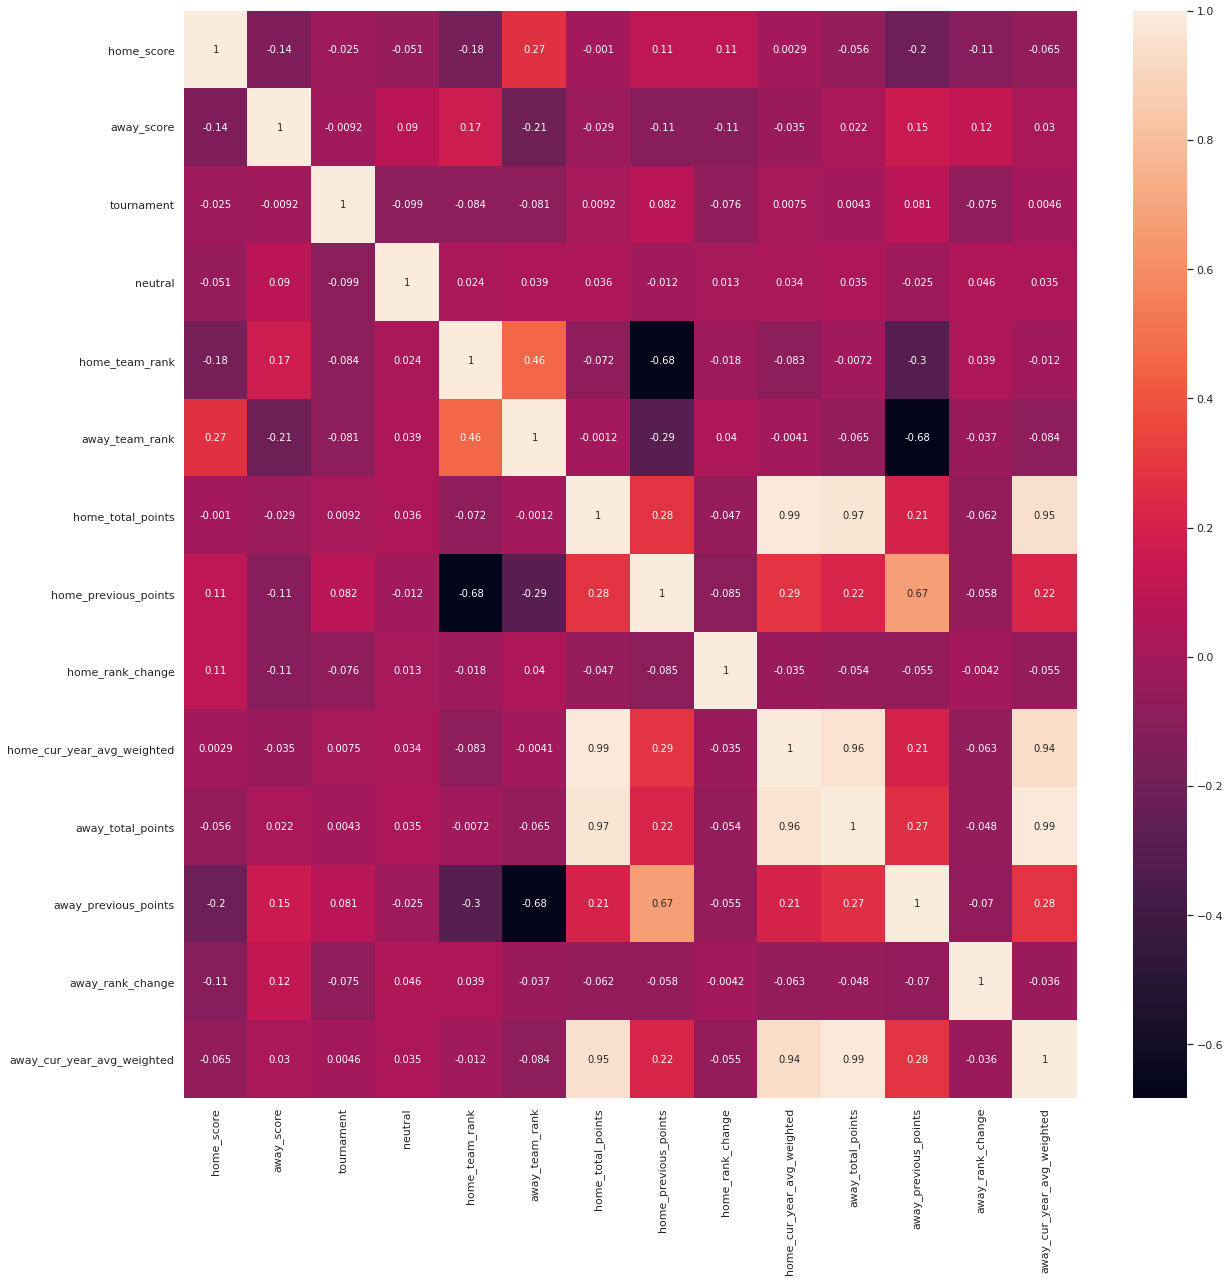

In [227]:
# Test for multicollinearity
plt.figure(figsize=(20, 20))
sns.heatmap(updated_match_stats.corr(method='spearman'), annot=True)

High correlation still exists between the home total points and the current year average weights.

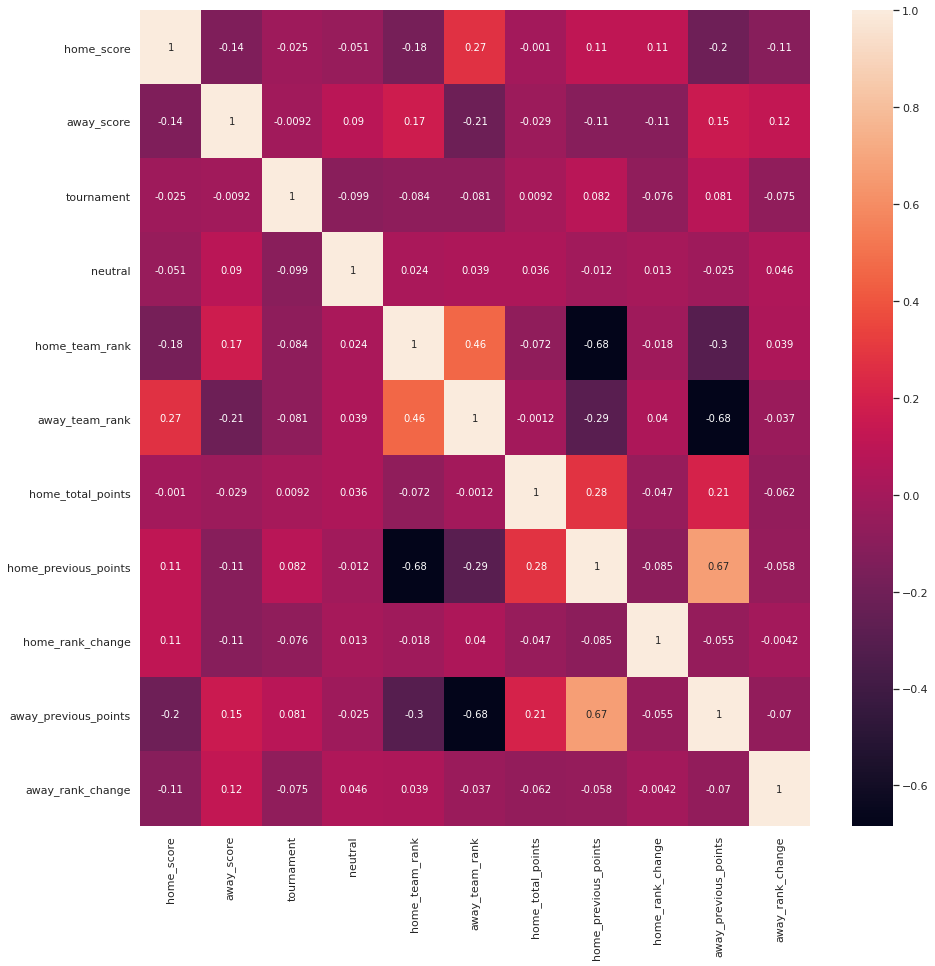

In [228]:
# Test for multicollinearity
plt.figure(figsize=(15,15))
updated_match_stats.drop(['home_cur_year_avg_weighted', 'away_cur_year_avg_weighted','away_total_points'], axis=1, inplace=True)
sns.heatmap(updated_match_stats.corr(method='spearman'), annot=True)


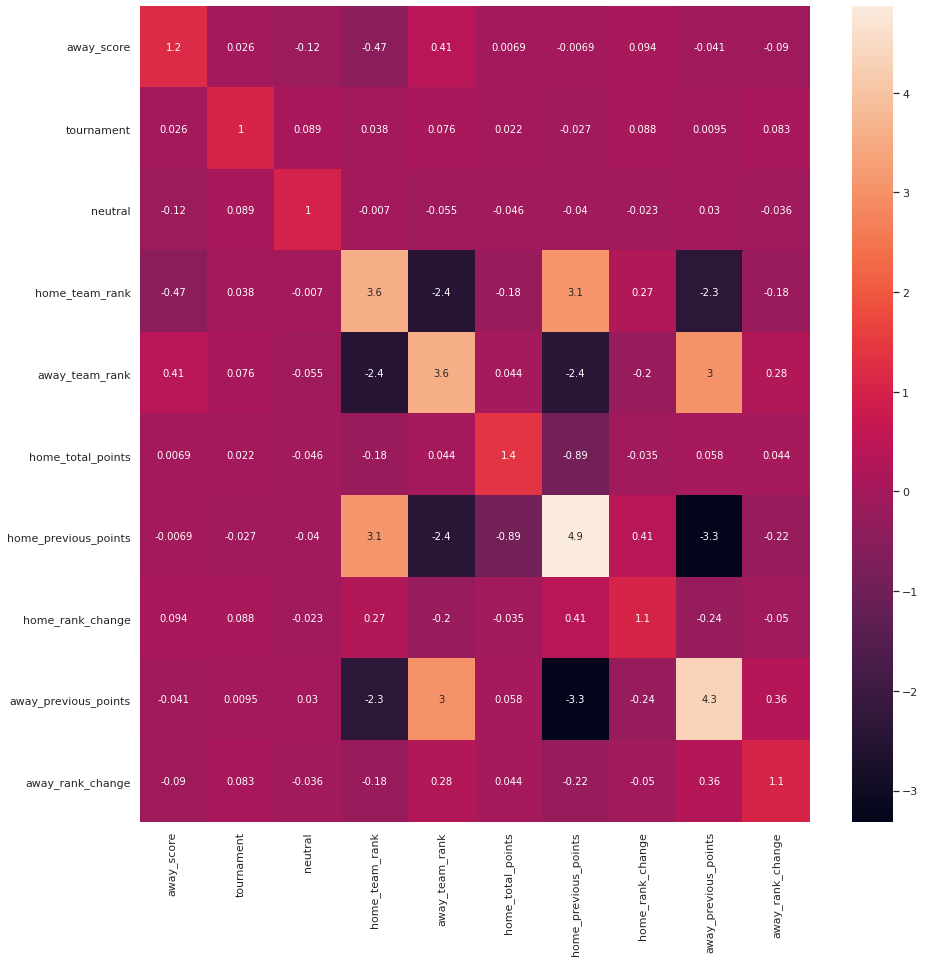

In [229]:
# Check for VIF scores of each
plt.figure(figsize=(15, 15))
corr = updated_match_stats.drop('home_score', axis=1).corr()
vif = pd.DataFrame(np.linalg.inv(corr), index=corr.index, columns=corr.columns)
sns.heatmap(vif, annot=True)

VIF scores of home previous points and away previous plots are close to 5, thus drop them 

In [230]:
updated_match_stats.drop(['away_previous_points','home_previous_points'], axis=1, inplace=True)

In [231]:
# Encode neutral column
match_stats = pd.get_dummies(updated_match_stats, columns=['neutral'], drop_first=True)

<Figure size 1080x1080 with 0 Axes>

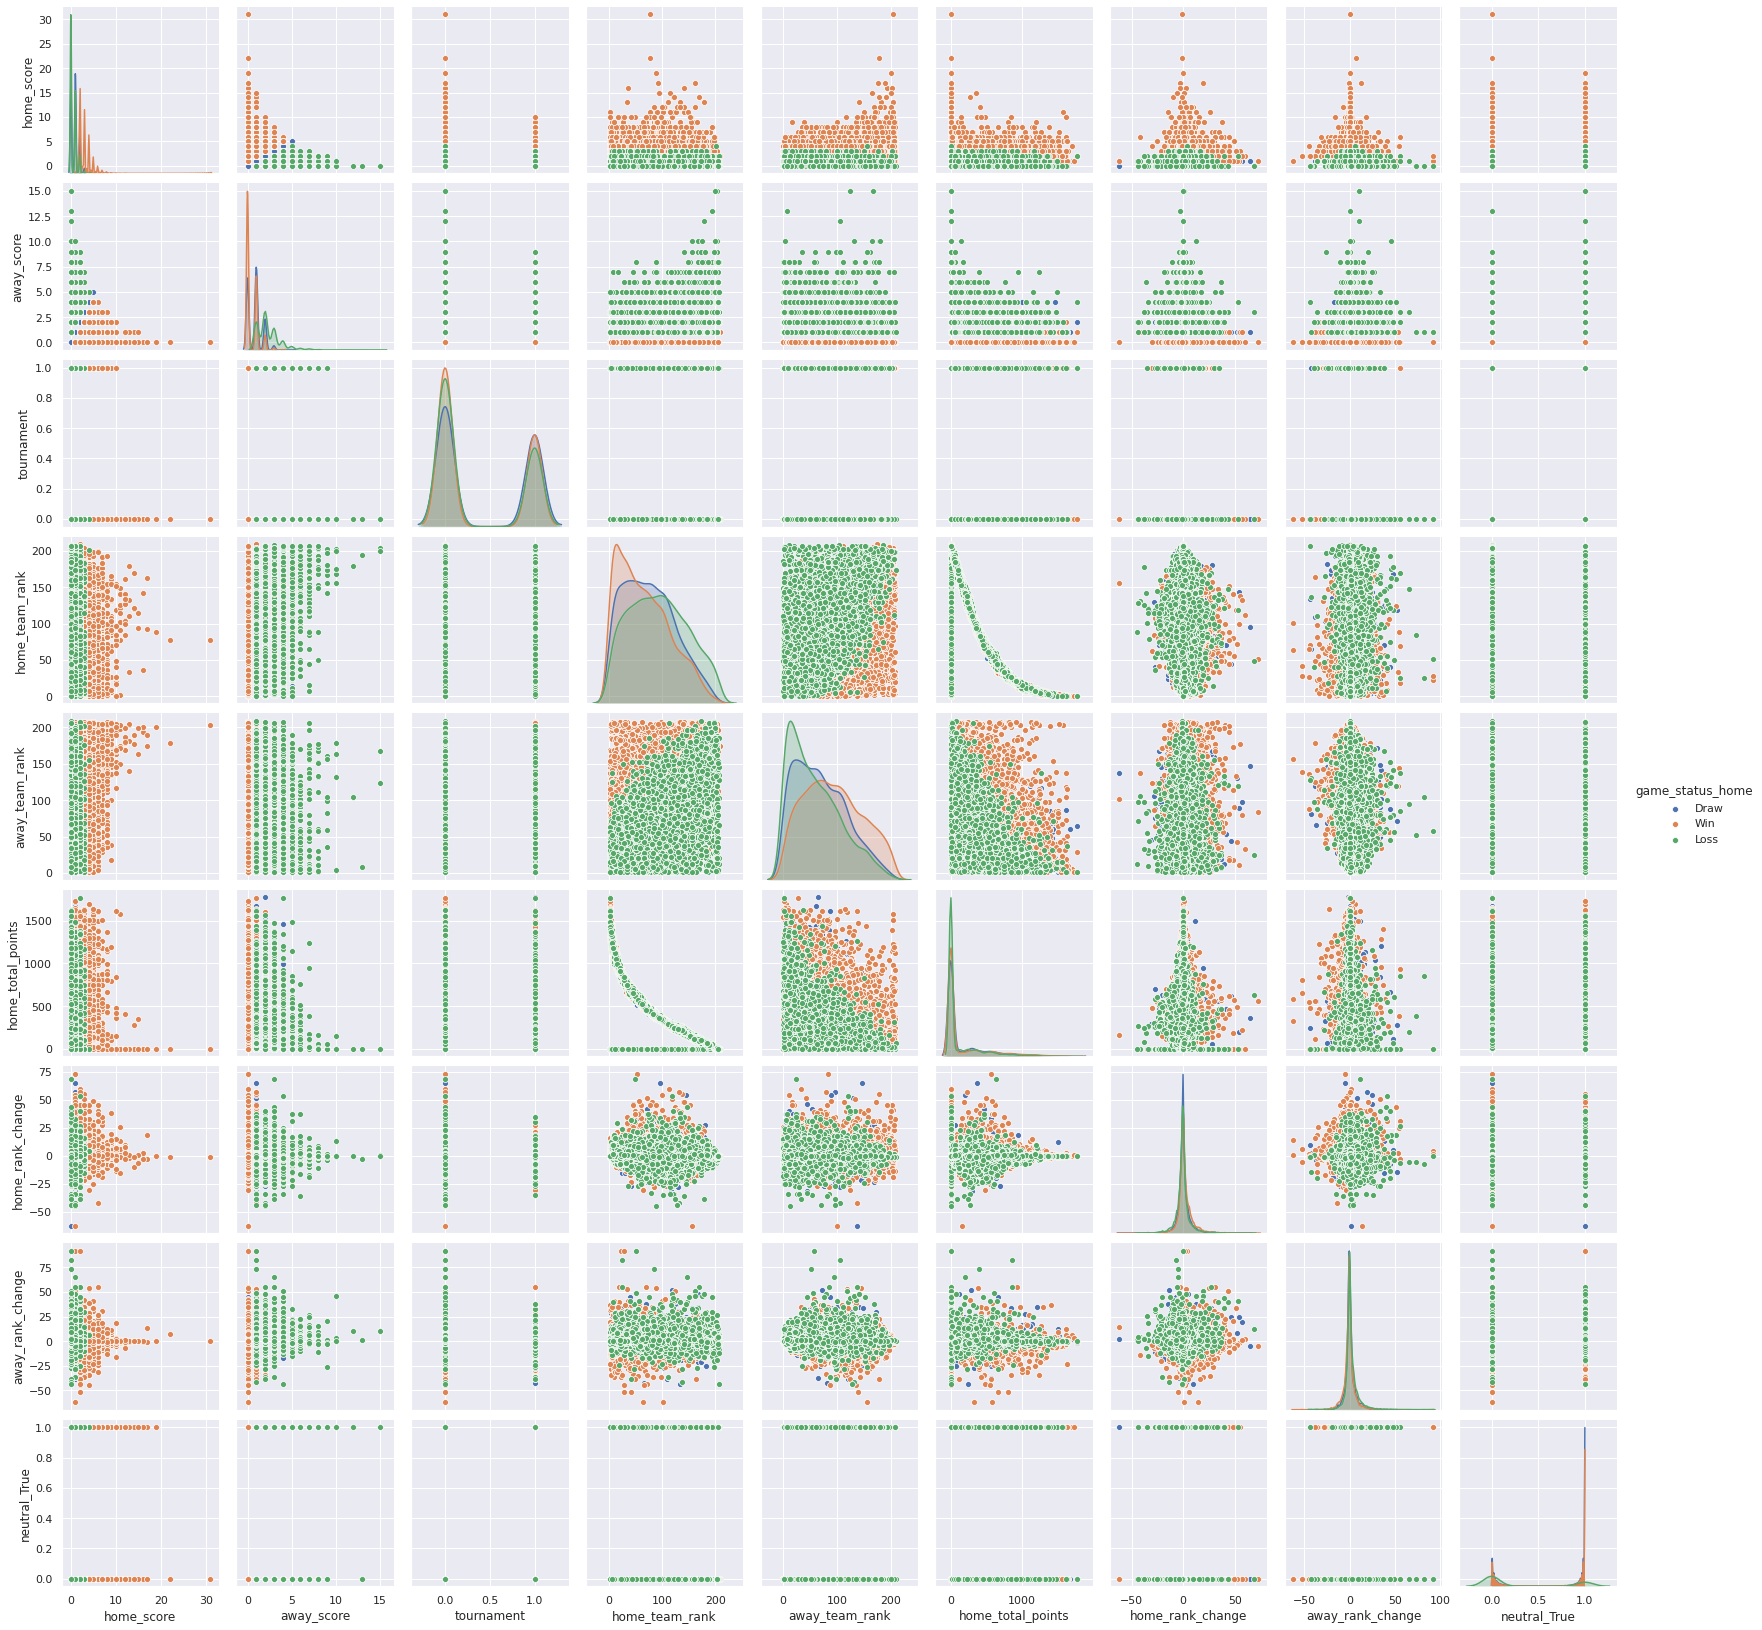

In [232]:
# Pairwise plot between numerical variable
plt.figure(figsize=(15.0, 15.0))
sns.pairplot(match_stats, hue='game_status_home')

Games where the home team has a higher rank, have more wins whereas matches where away teams have a higher rank have more losses.

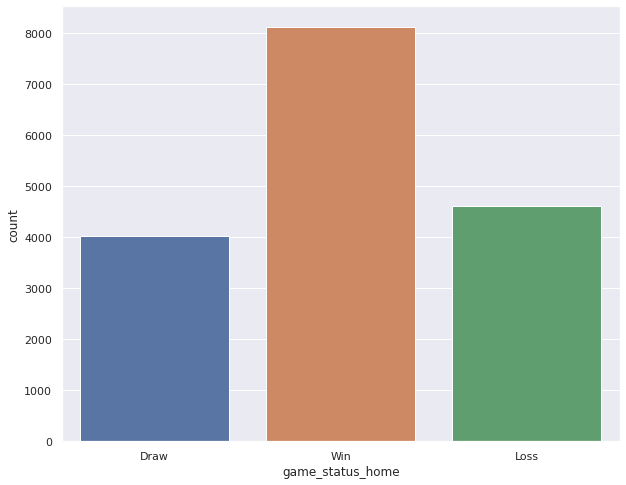

In [233]:
# Check for distribution among classes
sns.countplot(match_stats['game_status_home'])

Matches where the home team won are quite high in number in comparison to matches where the home team lost or there was a draw.

### Modelling

In [234]:
# Split data into features and target variable
x = match_stats.drop('game_status_home', axis=1)
y = match_stats['game_status_home']

In [235]:
# Encode target variable
result_flag = {'Win': 2, 'Draw':1, 'Loss':0}
y = y.map(result_flag)

In [236]:
# Split_data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42, stratify=y)

In [237]:
# Scale features
scaler = StandardScaler()
scaler.fit(x_train.drop('neutral_True', axis=1))
num_train = scaler.transform(x_train.drop('neutral_True', axis=1))
x_train = np.concatenate((num_train, x_train['neutral_True'].values.reshape(-1,1)), axis=1)

num_test = scaler.transform(x_test.drop('neutral_True', axis=1))
x_test = np.concatenate((num_test, x_test['neutral_True'].values.reshape(-1,1)), axis=1)

In [238]:
# Fit and train model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [239]:
print(confusion_matrix(y_pred, y_test))

[[1387    0    0]
 [   0 1208    0]
 [   0    0 2437]]


In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1387
           1       1.00      1.00      1.00      1208
           2       1.00      1.00      1.00      2437

    accuracy                           1.00      5032
   macro avg       1.00      1.00      1.00      5032
weighted avg       1.00      1.00      1.00      5032



The model has a 100% accuracy, correctly classifying each match.

### Regression

According to the pairplot plotted created earlier there is a relationship between home score and away score. As shown in the scatter plot below, the relationship is non-linear in nature.

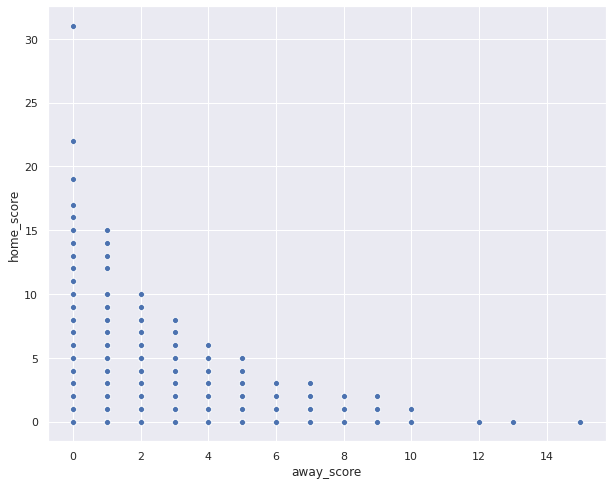

In [241]:
sns.scatterplot(match_stats['away_score'], match_stats['home_score'])

In [242]:
# Split data into features and target variable 

x = match_stats.drop('home_score', axis=1)
y = match_stats['home_score']

# Encode game status home
x['game_status_home'] = x.game_status_home.map(result_flag)

In [243]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [244]:
# Scale features
# Scale features
scaler = StandardScaler()
scaler.fit(x_train.drop(['neutral_True','game_status_home'], axis=1))
num_train = scaler.transform(x_train.drop(['neutral_True', 'game_status_home'], axis=1))
x_train = np.concatenate((num_train, x_train[['neutral_True','game_status_home']].to_numpy(dtype=np.int64)), axis=1)

num_test = scaler.transform(x_test.drop(['neutral_True', 'game_status_home'], axis=1))
x_test = np.concatenate((num_test, x_test[['neutral_True','game_status_home']].to_numpy(dtype=np.int64)), axis=1)

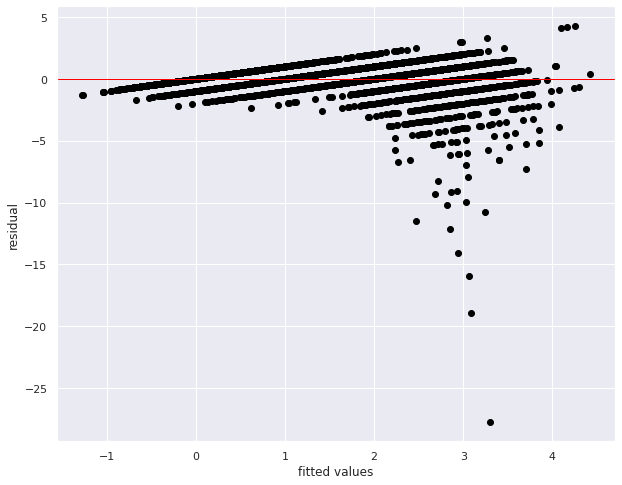

In [245]:
# Build a linear regression model and see how it fits the data

linearreg = LinearRegression()
linearreg.fit(x_train, y_train)

y_pred = linearreg.predict(x_test)
residuals = np.subtract(y_pred, y_test)

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [247]:
# Get the mean of residuals
print('Residual Mean: ', np.mean(residuals))
print('Residual Max: ', np.max(residuals))

Residual Mean:  -0.0049041477832165205
Residual Max:  4.254397201929133


Despite a fairly small residual mean, the maximum residual is quite large indicating either the presence of outliers or unexplained variance in the data which could be the result of polynomial relationships in the data.

In [248]:
# Evaluate the model
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)) )

RMSE:  1.270257114794483


In [249]:
# Investigate 10% mean of the target variable
np.mean(match_stats['home_score']) * 0.1

0.16082523403494128

The RMSE score is greater than 10% of the mean of the target variable. To try and improve the performance of the model, try a polynomial regression model that better fits the data.

In [255]:
# Define function for polynomial regression

def poly_regression(degree):

  poly_features = PolynomialFeatures(degree=degree)

  #transform features into higher degree
  x_train_poly = poly_features.fit_transform(x_train)

  #fit model
  poly_model = LinearRegression()
  poly_model.fit(x_train_poly, y_train)
  
  # predicting on test data-set
  y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))
  
  # evaluating the model on training dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
  print(f'RMSE on test set: {rmse_test}')

  #Plot residual plots for the models
  test_residuals = np.subtract(y_test_predicted, y_test)  
  plt.scatter(y_test_predicted, test_residuals, color='black')
  plt.ylabel('residual')
  plt.xlabel('fitted values')
  plt.axhline(y= test_residuals.mean(), color='red', linewidth=1)
  plt.show()

  return (y_test_predicted, residuals)

Regression of degree: 2
RMSE on test set: 1.1926209919664268


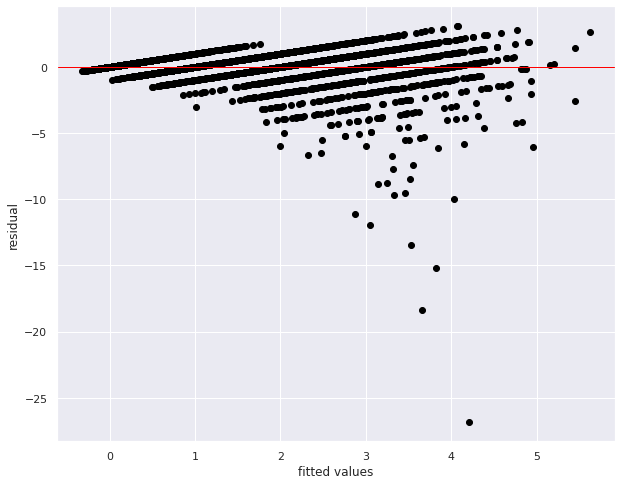

********************

Regression of degree: 3
RMSE on test set: 1.1644212751575524


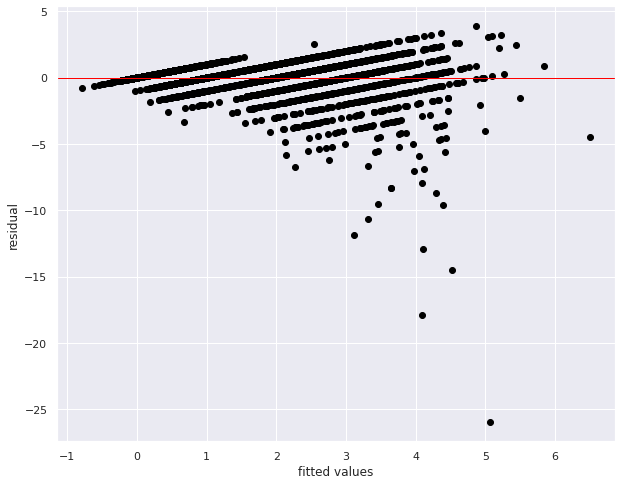

********************

Regression of degree: 4
RMSE on test set: 1.1992937180211418


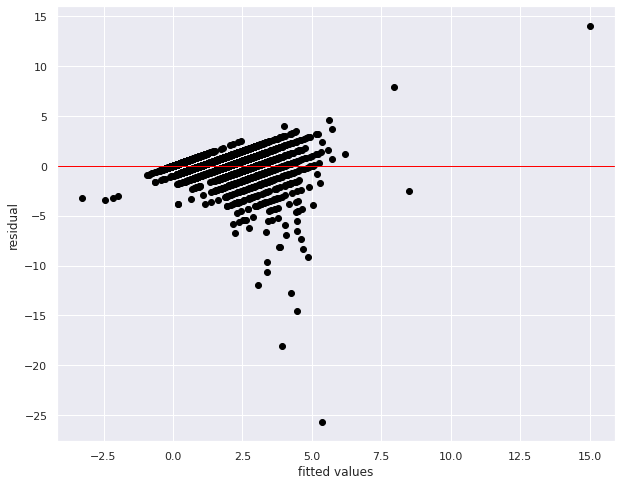

********************

Regression of degree: 5
RMSE on test set: 1.6802698233197337


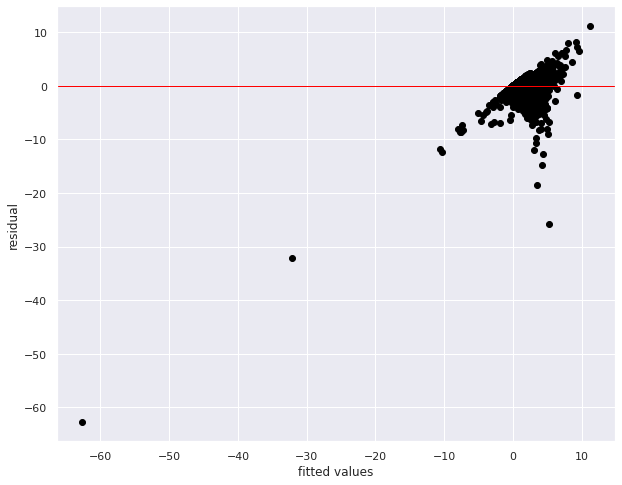

********************

Regression of degree: 6
RMSE on test set: 2710.2805845494736


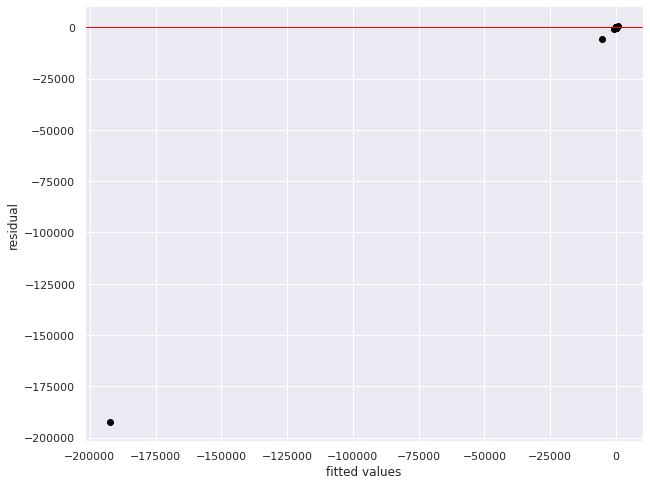

********************



In [256]:
# Test the regression model on different degress
for i in __builtin__.range(2, 7):
  print(f'Regression of degree: {i}')
  poly_regression(i)
  print('********************\n')

The best performing model with an RMSE of 1.164 has a degree of 3

RMSE on test set: 1.1644212751575524


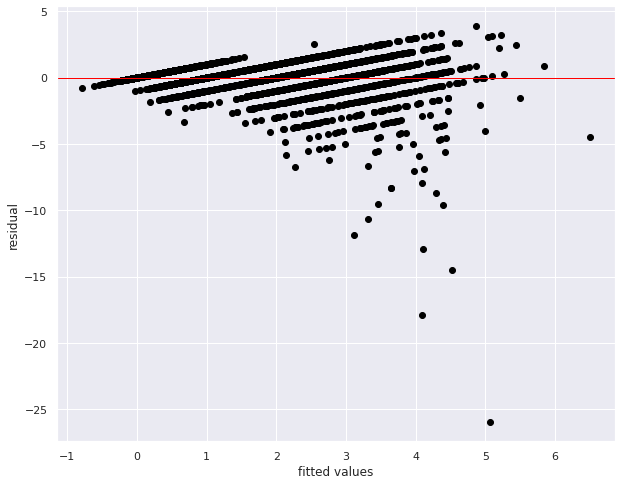

In [257]:
y_pred, residuals = poly_regression(3)

In [260]:
# Perform a bartlett test of variance 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



5352.545422500446
the variances are homogeneous!


### Results

The polynomial model performed better than the linear model with an RMSE of 1.164, indicating that indeed there is a polynomial relationship in the data. The variances of the residuals according to the bartlett test is also homogeneous.



### Challenging the Solution

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes. The data available for analysis was suitable for analysis, however a large percentage of match data was lost due to the unavailability of FIFA ranking data for the years in which the matches were played.

#### c) What can be done to improve the solution?
- Tuning of the polynomial model.
- More sophisticated categorization of tournaments instead on just friendly or not.